<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Arka, Jinkun, Rawal, Rohan, Sheng-Yu

## Q5 Image Compression with Autoencoders [Extra Credit] (25 points)

**Note: We would recommend finishing Question 4 (pytorch) before attempting this question**

**Please include all the write up answers to HW3:PDF.**

An autoencoder is a neural network that is trained to attempt to copy its input to its output, but it usually allows copying only approximately. This is typically achieved by restricting the number of hidden nodes inside the autoencoder; in other words, the autoencoder would be forced to learn to \textit{represent} data with this limited number of hidden nodes. This is a useful way of learning compressed representations.
In this section, we will continue using the NIST36 dataset you have from the previous questions.

### Q5.1 Building the Autoencoder

#### Q5.1.1 (10 points Code)

Due to the difficulty in training auto-encoders, we have to move to the $relu(x) = max(x,0)$ activation function. It is provided for you in **q1.ipynb**. Implement a 2 hidden layer autoencoder where the layers are 
1. 1024 to 32 dimensions, followed by a ReLU
2. 32 to 32 dimensions, followed by a ReLU
3. 32 to 32 dimensions, followed by a ReLU
4. 32 to 1024 dimensions, followed by a sigmoid (this normalizes the image output for us)

The loss function that you're using is total squared error for the output image compared to the input image (they should be the same!).  

<font color="red">**Please include the screenshot of code to theory.ipynb**</font>

In [58]:
import numpy as np
import scipy.io
from ipynb.fs.defs.q1 import *
import ipynb
import nbimporter
from collections import Counter

train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

# we don't need labels now!
train_x = train_data['train_data']
valid_x = valid_data['valid_data']

max_iters = 100
# pick a batch size, initial learning rate
batch_size = 100
learning_rate = 1e-4


hidden_size = 32
lr_rate = 20

batches = get_random_batches(train_x,np.ones((train_x.shape[0],1)),batch_size)
batch_num = len(batches)

params_autoenc = Counter()

initialize_weights(1024, hidden_size, params_autoenc, name = "enc1")
initialize_weights(hidden_size, hidden_size, params_autoenc, name = "enc2")
initialize_weights(hidden_size, hidden_size, params_autoenc, name = "de1")
initialize_weights(hidden_size, 1024, params_autoenc, name = "de2")

def autoencoder_forward(X, params):
    out1 = forward(X, params_autoenc, name = "enc1",    activation=relu)
    out2 = forward(out1, params_autoenc, name = "enc2", activation=relu)
    out3 = forward(out2, params_autoenc, name = "de1",  activation=relu)
    out4 = forward(out3, params_autoenc, name = "de2",  activation=sigmoid)
    return out4

def autoencoder_backwards(delta, params):
    deltade2  = backwards(delta=delta, params = params, name = "de2", activation_deriv = sigmoid_deriv)
    deltade1  = backwards(delta=deltade2, params = params, name = "de1", activation_deriv = relu_deriv)
    deltaenc2 = backwards(delta=deltade1, params = params, name = "enc2", activation_deriv = relu_deriv)
    deltaenc1 = backwards(delta=deltaenc2, params = params, name = "enc1", activation_deriv = relu_deriv)

#### Q5.1.2 (5 points, auto-grader)

To help even more with convergence speed, we will implement [momentum](http://cs231n.github.io/neural-networks-3/#sgd). Now, instead of updating $W = W - \alpha \frac{\partial J}{\partial W}$, we will use the update rules $M_W = 0.9 M_W - \alpha \frac{\partial J}{\partial W}$ and $W = W + M_W$. To implement this, populate the parameters dictionary with zero-initialized momentum accumulators, one for each parameter. Then simply perform both update equations for every batch.

In [59]:
def momentum_update(w: np.ndarray, m_w: np.ndarray, grad_w: np.ndarray, alpha: float, momentum: float=0.9):
    '''
    Momentum update
    
    [input]
    * w -- parameters
    * m_w -- the momentum of the parameters
    * grad_x -- parameter gradients
    * alpha -- learning rate
    * momentum -- the momentum factor
    
    [output]
    * w -- updated parameters
    * m_w -- updated momentum of the parameters
    '''

    m_w = momentum * m_w - alpha * grad_w
    w   = w + m_w
    return w, m_w

### Q5.2 Training the Autoencoder (3 Points Code+WriteUp)
 
Using the provided default settings, train the network for 100 epochs. What do you observe in the plotted training loss curve as it progresses?


<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

itr: 00 	 loss: 171.01
itr: 00 	 loss: 341.11
itr: 00 	 loss: 509.47
itr: 00 	 loss: 675.83
itr: 00 	 loss: 838.61
itr: 00 	 loss: 991.18
itr: 00 	 loss: 1119.42
itr: 00 	 loss: 1213.12
itr: 00 	 loss: 1301.48
itr: 00 	 loss: 1389.07
itr: 00 	 loss: 1471.25
itr: 00 	 loss: 1553.42
itr: 00 	 loss: 1634.29
itr: 00 	 loss: 1714.85
itr: 00 	 loss: 1796.13
itr: 00 	 loss: 1869.81
itr: 00 	 loss: 1947.87
itr: 00 	 loss: 2023.22
itr: 00 	 loss: 2101.64
itr: 00 	 loss: 2173.08
itr: 00 	 loss: 2248.07
itr: 00 	 loss: 2321.12
itr: 00 	 loss: 2395.83
itr: 00 	 loss: 2469.66
itr: 00 	 loss: 2542.99
itr: 00 	 loss: 2613.63
itr: 00 	 loss: 2689.71
itr: 00 	 loss: 2761.61
itr: 00 	 loss: 2833.79
itr: 00 	 loss: 2909.01
itr: 00 	 loss: 2980.35
itr: 00 	 loss: 3050.54
itr: 00 	 loss: 3122.14
itr: 00 	 loss: 3193.84
itr: 00 	 loss: 3263.72
itr: 00 	 loss: 3334.99
itr: 00 	 loss: 3408.89
itr: 00 	 loss: 3479.47
itr: 00 	 loss: 3554.75
itr: 00 	 loss: 3626.81
itr: 00 	 loss: 3695.92
itr: 00 	 loss: 3766.0

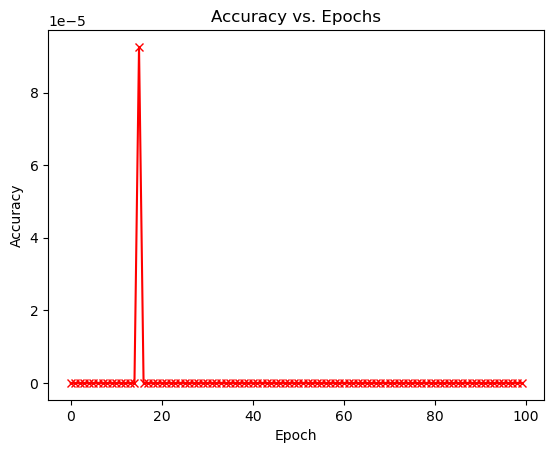

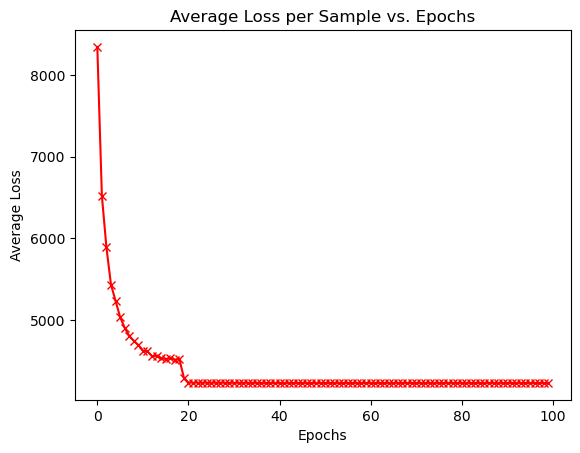

In [60]:

out = {}
for k,v in params_autoenc.items():
    if "W" in k or "b" in k and "_" not in k:
        out['m_'+ k] = 0
# Merge the dictionaries
params_autoenc = {**params_autoenc, **out}

train_acc_arr = []
train_loss_arr = []
for itr in range(max_iters):
    total_loss = 0
    total_acc  = 0
    for xb,_ in batches:
        # Forward Pass
        x_hat = autoencoder_forward(xb, params_autoenc)

        # loss
        # be sure to add loss and accuracy to epoch totals
        _, acc_b = compute_loss_and_acc(y = xb, probs = x_hat)
        loss_b = np.sum((x_hat - xb) ** 2)
        total_loss += loss_b / len(batches)
        total_acc  += acc_b / len(batches)
        
        # Obtain the gradient with the backwards function
        autoencoder_backwards((x_hat-xb), params_autoenc)
        
        # Do the momentum update for each parameter
        for k,v in params_autoenc.items():
            if "_" not in k:
                if "W" in k or "b" in k:
                    m_v = params_autoenc['m_'+ k]
                    params_autoenc[k], params_autoenc['m_'+ k] = momentum_update(v, m_v, grad_w = params_autoenc["grad_" + k], alpha = learning_rate)

        if itr % 2 == 0:
            print("itr: {:02d} \t loss: {:.2f}".format(itr,total_loss))
        if itr % lr_rate == lr_rate-1:
            learning_rate *= 0.9

    # Add it to the list
    train_acc_arr.append(total_acc)
    train_loss_arr.append(total_loss)

    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f}".format(itr,total_loss))
    if itr % lr_rate == lr_rate-1:
        learning_rate *= 0.9



# Accuracy
from matplotlib import pyplot as plt
plt.figure(1)
epochs = list(range(max_iters))
plt.title("Accuracy vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(epochs, train_acc_arr, "rx-", label = "Training Accuracy")

# Loss
plt.figure(2)
plt.title("Average Loss per Sample vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.plot(epochs, train_loss_arr, "rx-", label = "Training Loss")

### Q5.3 Evaluating the Autoencoder

#### Q5.3.1(4 Points Code+WriteUp)
 
Now let’s evaluate how well the autoencoder has been trained.
 Select 5 classes from the total 36 classes in your dataset and for each selected class include in your report 2 validation images and their reconstruction. What differences do you observe that exist in the reconstructed validation images, compared to the original ones?


<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


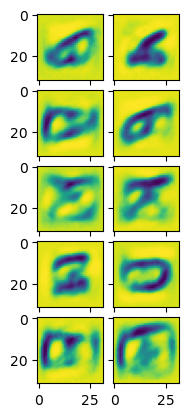

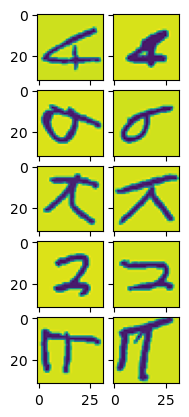

In [91]:
import matplotlib.pyplot as plt
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

visits = {}
cache_orig = {0: [], 15: [], 10:[], 20:[], 5:[]}
cache = {0: [], 15: [], 10:[], 20:[], 5:[]}
classes = [0, 5,10,15,20]
cnt = 0
for i, x in enumerate(valid_x):
    y = np.argmax(valid_y[i])
    print(y)
    if y in classes:
        if not visits.get(y):
            visits[y] = 1
        else:
            visits[y] += 1
        
        if visits[y] < 3:
            i+=1
            x_hat = autoencoder_forward(x, params_autoenc)
            cache[y].append(x_hat.reshape(32,32))
            cache_orig[y].append(x.reshape(32, 32))
        if cnt == 10:
            break

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1)
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5,2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
idx = 0
for label, imgs in cache.items():
    for img in imgs:
        grid[idx].imshow(img)
        idx+=1

fig = plt.figure(2)
grid2 = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5,2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


#### Q5.3.2 (3 Points Code+WriteUp)
 
Let’s evaluate the reconstruction quality using Peak Signal- to-noise Ratio (PSNR). PSNR is defined as
\begin{align}
\text{PSNR} = 20 \times \log_{10}(\text{MAX}_I) - 10\times \log_{10}(\text{MSE})
\end{align}
where $\text{MAX}_I$ is the maximum possible pixel value of the image, and $\text{MSE}$ (mean squared error) is computed across all pixels. You may use [skimage.measure.compare\_psnr](http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_psnr) for convenience. Report the average PSNR you get from the autoencoder across all validation images.

<font color="red">**Please include the write up answer to theory.ipynb**</font>

In [93]:
from skimage.metrics import peak_signal_noise_ratio as psnr
# evaluate PSNR

avg_psnr = 0
for i, x in enumerate(valid_x):
    x_hat = autoencoder_forward(x, params_autoenc)
    avg_psnr += psnr(x, x_hat)/len(valid_x)

print(f"Average PSNR for Validation Images: {avg_psnr}")

Average PSNR for Validation Images: 14.0804120512785
